# **Qiskit e IBM Q experience**
Abaixo, um chip da IBM com qubits supercondutores, chamados transmons, por volta de 2017 (https://www.eetimes.com/ibm-simulates-complex-chemistry-with-quantum-computing/).

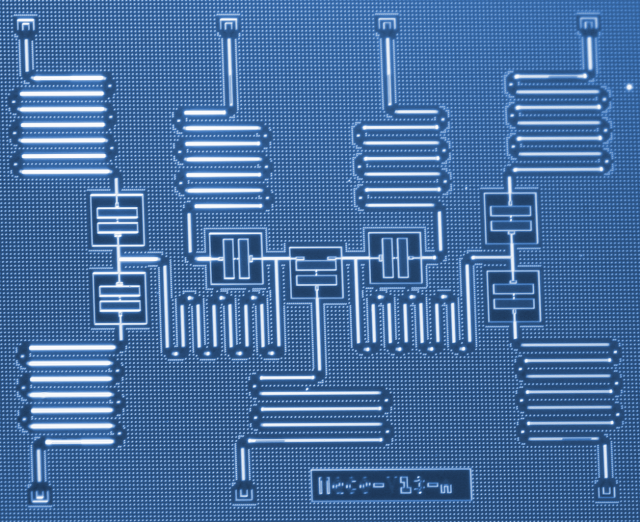

# **O transmon em uma versão mitologicamente articulada**
Qual a ideia qualitativa para entender um transmon? Tem uma referência
quanto à etimologia desse nome no wikidictionary: ``Abbreviation
of transmission line shunted plasma oscillation qubit''. O Chatgpt
discorda... Enfim... C'est la vie... c'est la vie... Enfin, c'est
ça c'est ça...

Uma descrição qualitativa, no entanto, pelo que eu entendo, é de acordo
com nosso atual Zeitgeist científico. Assim, pegamos um material supercondutor.
Esse é o dogma, pois há quem trabalhe, de fato, com esse tipo de material.
Dizem, então, que para temperaturas baixas o batante, talvez lá da
ordem de $15$ mK, ocorre uma transição de fase quântica. A maneira
pela qual entendo isso é como segue. Primeiro, há o fato de que quando
a temperatura é baixa o bastante, as vibrações térmicas do material
têm um valor de $k_{B}T$ que é menor do que a ordem de uma interação
atrativa indireta efetiva entre os elétrons do material. É assim,
contam que os elétrons, que se repelem fortemente pela repulsão coulombiana,
também interagem fortemente com os caroços atômicos do material que,
sem os elétrons que estamos considerando, são efetivamente positivos.
Essa interação, conforme os elétrons se movem no material, já que
não podem ficar parados, usando o princípio de incerteza, já que não
estão localizados, sacode a estrutura do material, digamos, uma rede
cristalina. Essas vibrações são em ordem de grandeza de energia vibracional
maior do que $k_{B}T$ e, portanto, geram fônons que se propagam na
rede. Esses fônons, por sua vez, interagem com elétrons distantes
dos que começamos considerando e, portanto, acabam, efetivamente,
sendo atraídos e se correlacionando com os primeiros. A repulsão,
no entanto, se torna menos saliente do que essa interação atrativa
indireta e, estatisticamente, suponho, os elétrons se emparelham no
que ficou conhecido como um par de Cooper.

Elétrons são férmions e não podem ocupar o mesmo estado quântico.
No entanto, em duplas, dois elétrons são bósons e, estes sim, podem
se acumular em um só estado quântico. Para minimizar energia, quando
$k_{B}T$ está em uma escala bastante pequena, esses bósons cooperianos
se acumulam em um estado fundamental. Esse efeito é o que se chama
condensação de Bose-Einstein. Aí, o pessoal de mecânica estatística
quântica chama a função de onda macroscópica que se forma de parâmetro
de ordem. Isso é o que os físicos atômicos chamam de onda de matéria,
honrando, talvez, inconscientemente, o velho Schrödinger. Outros,
como Sir Keith Burnett, chamava de laser atômico. Aqui, no entanto,
seria um laser de pares de Cooper, mas ``hardily'' o pessoal de
supercondutividade iria usar uma tal nomenclatura.

Com isso, temos algo bastante interessante quando construímos uma
junção entre dois desses supercondutores, separados por uma junção,
chamada de junção de Josephson. Essa junção é só um isolante através
da qual os pares de Cooper podem tunelar de um supercondutor ao outro.
Foi a previsão de que pares de Cooper podem tunelar desse jeito que
deu o prêmio Nobel a Josephson. Então, a ideia de um transmon é construir
um par de supercondutores próximos e separados por uma junção de Josephson.
Com a aplicação de uma diferença de potencial entre os supercondutores,
há um acúmulo de pares de Cooper de um lado (com o poencial mais alto)
e um déficit de pares de Cooper do outro lado (com o potencial mais
baixo). A corrente que se efetiva na junção, portanto, gera um campo
magnético que gira perpendicularmente ao plano dos dois supercondutores
separados pela junção. Assim, temos um capacitor, formado pelos dois
supercondutores, acoplado em paralelo com um indutor, formado pela
junção através da qual há a corrente de pares cooperianos. Com isso,
temos um circuito $LC.$ A lagrangeana desse circuito é formalmente
a do oscilador harmônico e, portanto, pode ser quantizada com operadores
de criação e destruição. O grande truque de usar junções de Josephson
é fazer com que os níveis de energia do oscilador harmônico não sejam
uniformemente separados, porque o oscilador harmônico efetivo é perturbado
por contribuições de termos anarmônicos. Isso permite isolar só os
dois níveis de menor energia desse oscilador efetivo, gerando o qubit
transmônico.

A seguir vamos usar o pacote qiskit que permite simular o que os processadores da IBM, como o da foto acima, podem fazer.

In [ ]:
!pip install qiskit qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [ ]:
# Create a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Apply a Hadamard gate on qubit 0
circuit.h(0)

# Apply a CNOT gate (control qubit 0, target qubit 1)
circuit.cx(0, 1)

# Add measurements to the circuit
circuit.measure_all()

# Draw the circuit
print(circuit)

In [ ]:
# Create the simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator backend
compiled_circuit = transpile(circuit, simulator)

In [ ]:
# Run the transpiled circuit on the simulator backend
result = simulator.run(compiled_circuit).result()

# Get the counts (measurement outcomes)
counts = result.get_counts(compiled_circuit)

# Print the counts
print("Measurement outcomes:", counts)

In [ ]:
# Create the statevector simulator backend
statevector_simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuit for the statevector simulator backend
compiled_circuit = transpile(circuit, statevector_simulator)

# Run the transpiled circuit on the statevector simulator backend
result = statevector_simulator.run(compiled_circuit).result()

# Get the statevector
state_vector = result.get_statevector()

# Print the statevector
print("Statevector:", state_vector)